In [1]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, BasicAer, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider
import math as m

In [26]:
def from_even(qc):
    qc_copy = qc.copy()
    qr = qc_copy.qubits
    N = len(qr)-1    # because N-1 qubits are used to represent position space and 1 qubit for the coin 
    coin = qr[len(qr)-1]

    qc_copy.h(coin)
    qc_copy.x(0)
    for i in range(N-1, 0, -1):
        ctrls = []
        for j in range(1, i): ctrls.append(j)
        ctrls.append(coin)
        qc_copy.mcx(ctrls, qr[i])
    
    return qc_copy

def from_odd(qc):
    qc_copy = qc.copy()
    qr = qc_copy.qubits
    N = len(qr)-1    # because N-1 qubits are used to represent position space and 1 qubit for the coin 
    coin = qr[len(qr)-1]

    qc_copy.h(coin)
    qc_copy.x(coin)
    qc_copy.x(0)
    for i in range(1, N):
        ctrls = []
        for j in range(1, i): ctrls.append(j)
        ctrls.append(coin)
        qc_copy.mcx(ctrls, qr[i])
    qc_copy.x(coin)
    
    return qc_copy

In [3]:
N = 5
qc = QuantumCircuit(QuantumRegister(N, 'q'), QuantumRegister(1, 'coin'), ClassicalRegister(N, 'c'))
odd_logic = from_odd(qc)
# odd_logic.draw('mpl', style='clifford')

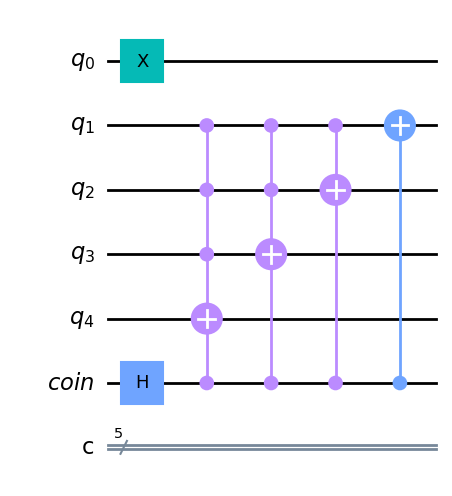

In [4]:
even_logic = from_even(qc)
even_logic.draw('mpl', style='clifford')

In [6]:
initial_state = ""
for i in range(N+1):
    initial_state += "0"
new = {initial_state[1:]: 10}
coin = QuantumRegister(1, 'coin')
nnqw = QuantumCircuit(QuantumRegister(N, 'q'), coin, ClassicalRegister(N, 'c'))
odd_logic = from_odd(nnqw)
even_logic = from_even(nnqw)
sv = Statevector.from_label(initial_state)

for i in range(((2**N)-1)//2):
    # if i%2 == 0:
    #     print("from even")
    #     sv = sv.evolve(even_logic)
    # else:
    #     print("from odd")
    #     sv = sv.evolve(odd_logic)
    sv = sv.evolve(even_logic)
    d = {}
    x = sv.to_dict()
    c = 0
    ss = []
    for key, value in x.items():
        if abs(value) > 1e-10:
            d[key[1:]] = value
            if key[1:] not in new.keys():
                c += 1
                new[key[1:]] = c
                ss.append(key[1:])
                # print(ss)
    print(f"|i=+{i+1}>=|{ss[0]}>\t\t|i=-{i+1}>=|{ss[1]}>")
    
                
    # print(f'After {i+1} toss(es): {len(d)} states and {c} new states')
    # print(new.keys())
    

|i=+1>=|00001>		|i=-1>=|00011>
|i=+2>=|00010>		|i=-2>=|00100>
|i=+3>=|00101>		|i=-3>=|00111>
|i=+4>=|00110>		|i=-4>=|01000>
|i=+5>=|01001>		|i=-5>=|01011>
|i=+6>=|01010>		|i=-6>=|01100>
|i=+7>=|01101>		|i=-7>=|01111>
|i=+8>=|01110>		|i=-8>=|10000>
|i=+9>=|10001>		|i=-9>=|10011>
|i=+10>=|10010>		|i=-10>=|10100>
|i=+11>=|10101>		|i=-11>=|10111>
|i=+12>=|10110>		|i=-12>=|11000>
|i=+13>=|11001>		|i=-13>=|11011>
|i=+14>=|11010>		|i=-14>=|11100>
|i=+15>=|11101>		|i=-15>=|11111>


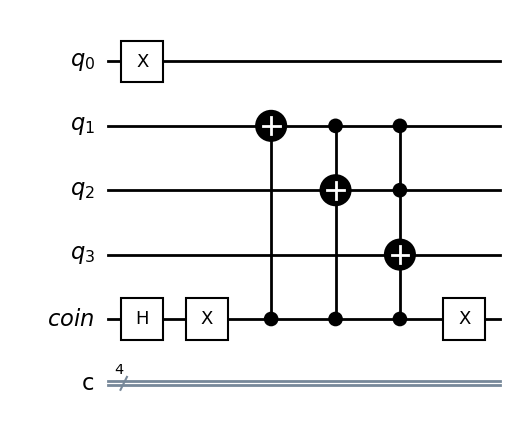

In [148]:
N = 4
qc = QuantumCircuit(QuantumRegister(N, 'q'), QuantumRegister(1, 'coin'), ClassicalRegister(N, 'c'))
qce = from_even(qc)
qco = from_odd(qc)
qco.draw('mpl', style='bw')

In [147]:
sv = Statevector.from_label('00101')
sv.evolve(qco).draw('latex')

<IPython.core.display.Latex object>